In [26]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [27]:
mcc = MouseConnectivityCache(resolution=10)

In [28]:
# annot, annot_info = mcc.get_annotation_volume()
annot, annot_info = mcc.get_annotation_volume(Path.home()/'Desktop'/'repos'/'allen_data_mining'/'connectivity'/'mouse_connectivity'/'annotation'/'ccf_2017'/'annotation_10.nrrd')

In [29]:
annot.shape
# connectivity centroids data coordinate ranges: 13200 µm x 8000 µm x 11400 µm

(1320, 800, 1140)

In [30]:
# Parameters
area = 'VISam'
projection_metric = 'projection_energy'
hemisphere_id = 1
projection_type = 'ipsilateral'
injection_volume_threshold = 0.01
projection_volume_threshold = 0.1

In [31]:
# Reading the file with centroids data
path = Path.home() / 'Desktop' / 'data' / 'connectivity'
foldername = f'centroids_{projection_metric}_hem_id_{hemisphere_id}_inj_vol_thresh_{injection_volume_threshold}_target_vol_thresh_{projection_volume_threshold}_{area}'
filename = f'{projection_type}_centroids_dict_hem_{hemisphere_id}_inj_vol_thresh_{injection_volume_threshold}_target_vol_thresh_{projection_volume_threshold}_{area}.pkl'
load_path = path / foldername / filename
with open(load_path, 'rb') as f: centroids_dict = pickle.load(f)

In [32]:
centroids_dict

{731: [3514, 3985, 4919, 38.81764008447669],
 425: [9731, 2539, 2223, 11.39665559141695],
 409: [9101, 1878, 2163, 136.2049408811814],
 255: [5970, 4060, 4820, 27.6066266443591],
 170: [7670, 3160, 3629, 53.654837212054],
 886: [8089, 903, 5307, 64.73910558561995],
 746: [3298, 3769, 4760, 132.62698290780543],
 894: [8532, 559, 4473, 13.797468595597845],
 1027: [8310, 2285, 1501, 441.973862516376],
 385: [8542, 1261, 3410, 70.67805908698594],
 162: [10430, 3970, 4930, 4.18178833038788],
 993: [4976, 1179, 5395, 13.39450599759822],
 541: [8050, 3970, 1370, 5.67925480112076],
 312782546: [7188, 811, 3177, 287.5206577109843],
 879: [8250, 740, 4780, 36.4887439180757],
 312782574: [8640, 2147, 2009, 94.54589205865337],
 342: [5965, 5791, 4080, 43.589037375743416],
 596: [5090, 6560, 4740, 53.0231518702732],
 1002: [7640, 2731, 781, 299.418019294861],
 218: [7258, 3077, 4378, 565.9653536803895],
 417: [7607, 969, 2804, 197.75259704057643],
 402: [8316, 1714, 2272, 265.1719789564647],
 1011:

In [33]:
# Extracting coordinates and values of projection metric
vals = centroids_dict.values()
area_ids = list(centroids_dict.keys())
xyz = [area[:3] for area in vals]
proj_metric = [area[3] for area in vals]

# Reading acronyms corresponding to area ids
with open(path / 'areas_acronyms.pkl', 'rb') as f: areas_acronyms_dict = pickle.load(f)

In [34]:
# Defining data normalisation and colormap
norm = matplotlib.colors.Normalize(vmin=min(proj_metric), vmax=max(proj_metric))

cmap = matplotlib.cm.get_cmap('viridis')

In [35]:
np.array(xyz)

array([[ 3514,  3985,  4919],
       [ 9731,  2539,  2223],
       [ 9101,  1878,  2163],
       [ 5970,  4060,  4820],
       [ 7670,  3160,  3629],
       [ 8089,   903,  5307],
       [ 3298,  3769,  4760],
       [ 8532,   559,  4473],
       [ 8310,  2285,  1501],
       [ 8542,  1261,  3410],
       [10430,  3970,  4930],
       [ 4976,  1179,  5395],
       [ 8050,  3970,  1370],
       [ 7188,   811,  3177],
       [ 8250,   740,  4780],
       [ 8640,  2147,  2009],
       [ 5965,  5791,  4080],
       [ 5090,  6560,  4740],
       [ 7640,  2731,   781],
       [ 7258,  3077,  4378],
       [ 7607,   969,  2804],
       [ 8316,  1714,  2272],
       [ 7890,  2350,  1530],
       [ 4760,  1975,  5185],
       [ 9617,  2357,  1664],
       [ 9304,   642,  4310],
       [ 3870,  2668,  5473],
       [ 7259,  1750,  2568]])

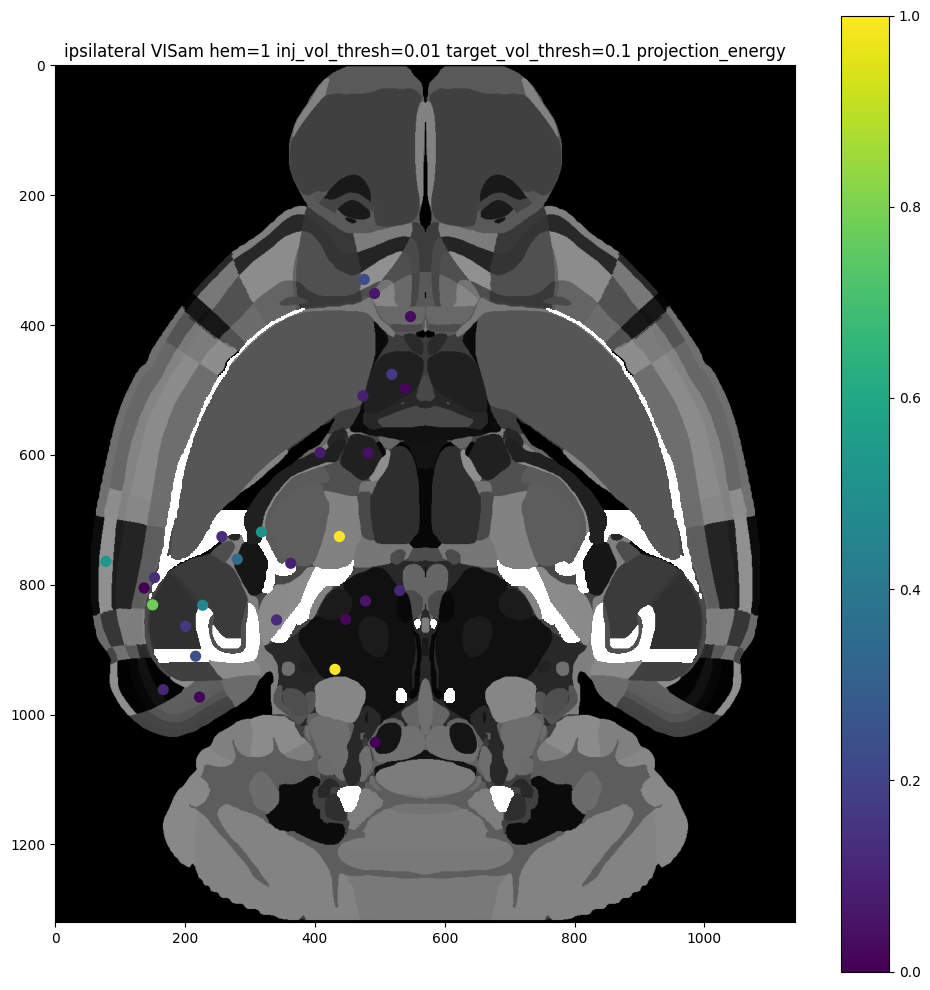

In [36]:
fig,ax = plt.subplots(figsize=(10,10))
# plt.figure()

names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

plt.title(f'{projection_type} {area} hem={hemisphere_id} inj_vol_thresh={injection_volume_threshold} target_vol_thresh={projection_volume_threshold} {projection_metric}')

plt.imshow(annot[:,400,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)

norm = matplotlib.colors.Normalize(vmin=min(proj_metric), vmax=max(proj_metric))

x = np.array(xyz)[:,2] / 10
y = np.array(xyz)[:,0] / 10
z = norm(proj_metric)

sc = plt.scatter(x, y, c=z, s=50, cmap=cmap)

plt.colorbar()

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

# fig.canvas.mpl_connect("motion_notify_event", hover)
fig.canvas.mpl_connect('button_press_event', hover)

plt.tight_layout()
plt.show()